### Projeto 4 ###
Alunos e Matrículas:

- Henrique Gabriel Gasparelo, 241708055;

- José Thevez Gomes Guedes, 241708005;

Disciplina: Álgebra Linear Numérica

Curso: Ciência de Dados e Inteligência Artificial

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
np.random.seed(42)

# Questão1. Matrizes Gaussianas.

### Uma matriz gaussiana tem todas as entradas $A_{ij}$ independentes e distribuídas segundo uma normal padrão, ou seja, $A_{ij} ∼ N(0,1)$.

####  **a) Distribuição das normas.** Faça um histograma da norma-2 das colunas de uma matriz gaussiana $A$, $m \times n$. Use vários valores de $m$, e comente o que você observa.

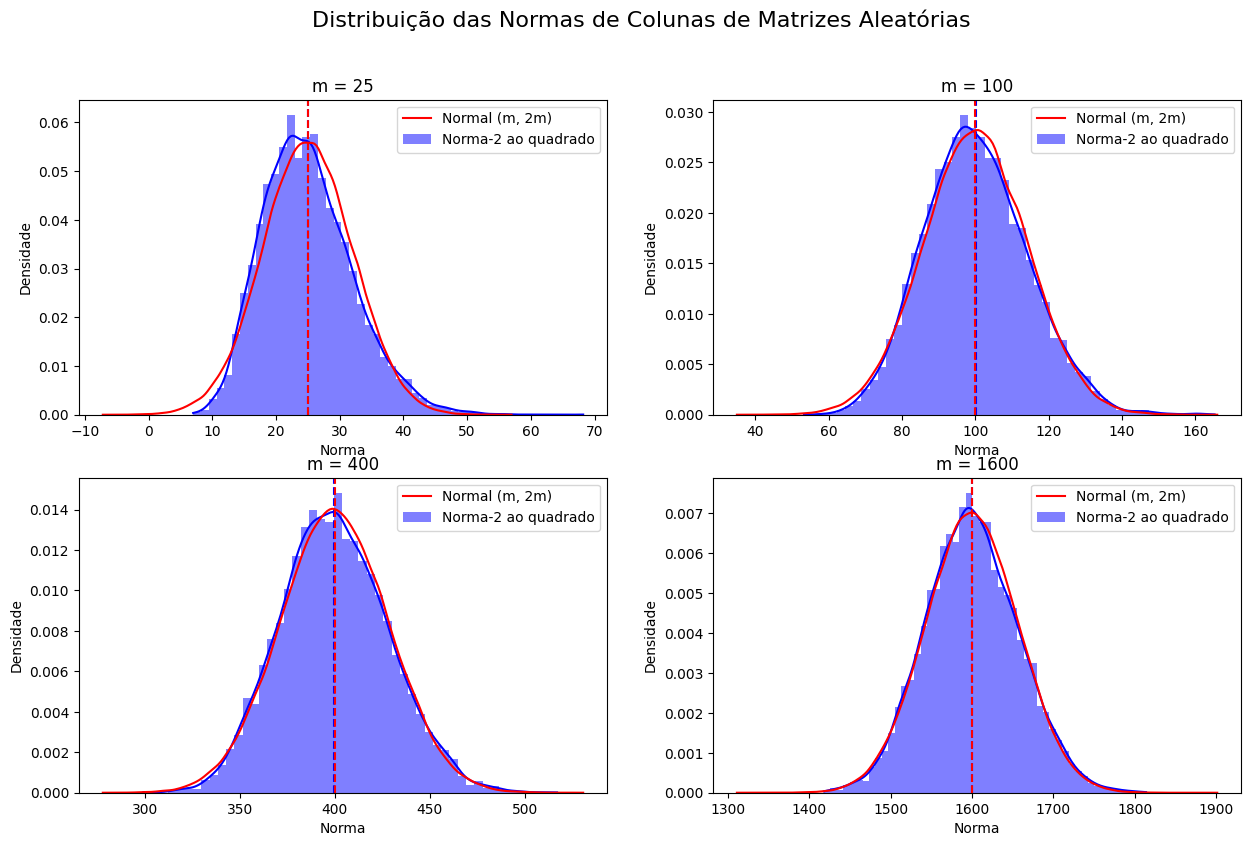

In [3]:
# Valores de m e n
ms = [25, 100, 400, 1600]
n = 10000

fig, axes = plt.subplots(2, 2, figsize=(15, 9))
fig.suptitle('Distribuição das Normas de Colunas de Matrizes Aleatórias', fontsize=16)
axes = axes.flatten()
l = 0
for m in ms:
    # Gera uma matriz gaussiana mxn
    A = np.random.randn(m, n)

    # Calcula a norma de cada coluna e armazena em um vetor
    norms = np.linalg.norm(A, axis=0)

    # Calcula a norma ao quadrado
    norms = norms ** 2

    # Calcula pontos de uma normal (m, 2m)
    normais = ((2 * m) ** 0.5) * np.random.randn(100000) + (m)

    # Plota um histograma das normas
    ax = axes[l]
    sns.histplot(norms, stat='density', color='blue', alpha=0.5, edgecolor=None, ax=ax, kde=True, bins=50, label="Norma-2 ao quadrado")
    ax.axvline(x=(np.mean(norms)), color='blue', linestyle='--')
    ax.axvline(x=(m), color='red', linestyle='--')
    sns.kdeplot(normais, color='red', ax=ax, label="Normal (m, 2m)")
    ax.set_title(f'm = {m}')
    ax.set_xlabel('Norma')
    ax.set_ylabel('Densidade')
    ax.legend()
    l += 1

plt.show()

**SOLUÇÃO:** Como o objetivo é apenas calcular as normas das colunas de $A$, então, o valor de $n$ representa a quantidade de amostras, para cada valor $m$, que serão utilizadas. Já o valor de $m$ representa o tamanho das colunas de $A$ e tem relação com a distribuição da norma-2 das colunas de $A$. A norma-2 de uma coluna de $A$ pode ser calculada como:

$$
\| A_j \|_2 = \sqrt{\sum_{i=1}^{m} A_{i j}^2}
$$

Calculando a norma-2 ao quadrado, tem-se:

$$
\| A_j \|_2^2 = \sum_{i=1}^{m} A_{i j}^2
$$

Como as entradas $A_{i j}$ da matriz $A$ são i.i.d $N(0,1)$, então conclui-se que:

$$
\| A_j \|_2^2 \sim \chi_{m}^2
$$

Onde $\chi_{m}^2$ é a distribuição qui quadrado com $m$ graus de liberdade, já que a distribuição qui quadrado é obtida somando variáveis aleatórias i.i.d $N(0,1)$ ao quadrado. Pode-se provar também que essa distribuição é equivalente a $Gama(\frac{m}{2}, \frac{1}{2})$. Deste modo, o valor esperado da norma-2 ao quadrado é $m$ e a variância é $2m$, utilizando as fórmulas de valor esperado e variância da distribuição Gama. No gráfico 1, pode-se observar, em azul, a densidade da norma-2 ao quadrado para diferentes valores de $m$, e pode-se notar, usando matrizes de 10000 colunas, ou seja, 10000 observações, que a média das observações obtidas é muito próxima de $m$, o que era esperado, uma vez que, pela Lei dos Grandes Números, a média das observações obtidas converge, em probabilidade, para o valor esperado da variável aleatória, que nesse caso é $m$, e o número de observações é grande, no caso igual a 10000. Além disso, percebe-se que o gráfico se aproxima de uma normal, o que pode ser explicado pelo Teorema Central do Limite, uma vez que a qui quadrado é a soma de variáveis aleatória i.i.d. com valor esperado e variância definidos, portanto:

$$
\frac{\| A_j \|_2^2 - E[\| A_j \|_2^2]}{\sqrt{Var(\| A_j \|_2^2)}} \xrightarrow{P} N(0,1) \Rightarrow \| A_j \|_2^2 \xrightarrow{P} N(m, 2m)
$$

Que condiz com o resultado encontrado no gráfico 1, uma vez que a densidade da norma-2 ao quadrado, em azul, se aproxima da densidade da normal $(m, 2m)$, em vermelho, a medida que se aumenta o valor de $m$.

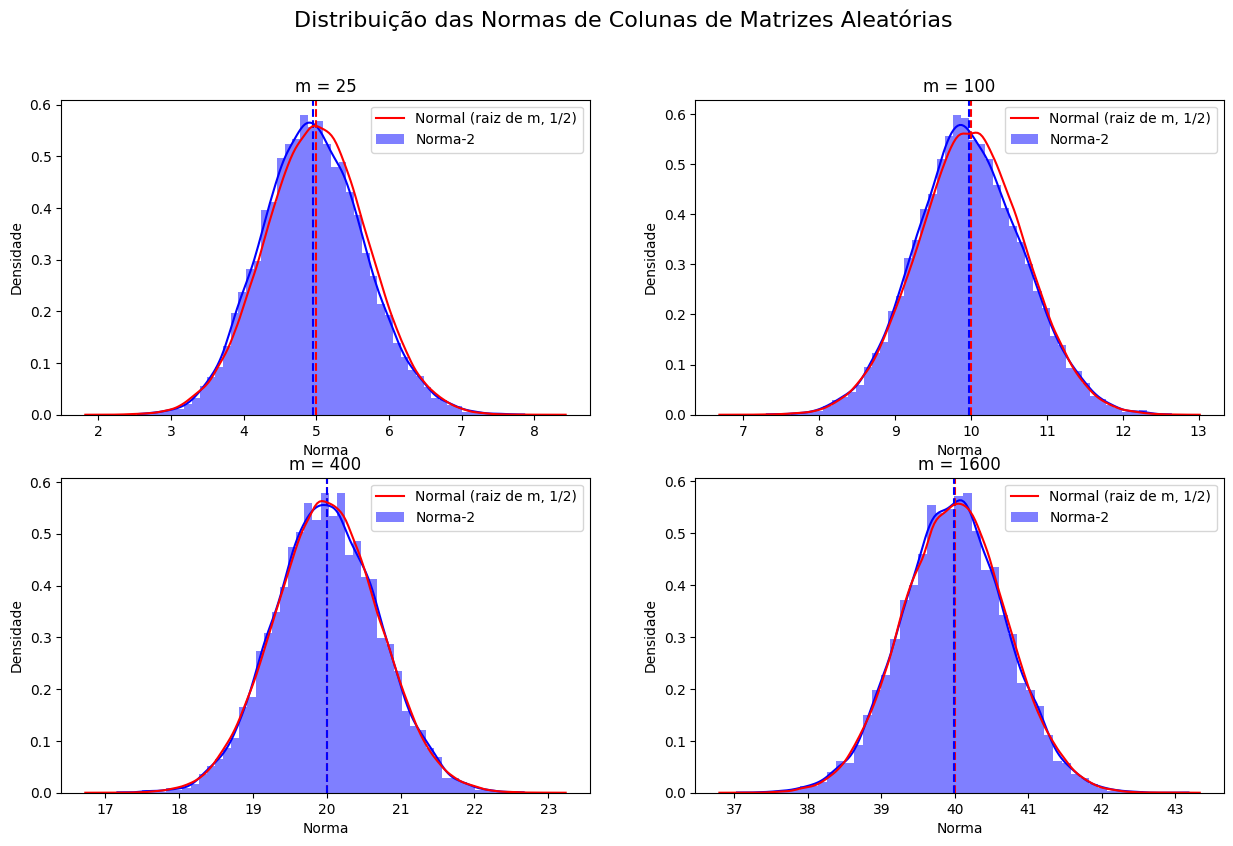

In [4]:
# Valores de m e n
ms = [25, 100, 400, 1600]
n = 10000

fig, axes = plt.subplots(2, 2, figsize=(15, 9))
fig.suptitle('Distribuição das Normas de Colunas de Matrizes Aleatórias', fontsize=16)
axes = axes.flatten()
l = 0
for m in ms:
    # Gera uma matriz gaussiana mxn
    A = np.random.randn(m, n)

    # Calcula a norma de cada coluna e armazena em um vetor
    norms = np.linalg.norm(A, axis=0)

    # Calcula pontos de uma normal (raiz de m, 1/2)
    normais = (0.5 ** 0.5) * np.random.randn(100000) + (m ** 0.5)

    # Plota um histograma das normas
    ax = axes[l]
    sns.histplot(norms, stat='density', color='blue', alpha=0.5, edgecolor=None, ax=ax, kde=True, bins=50, label="Norma-2")
    ax.axvline(x=(m ** 0.5), color='red', linestyle='--')
    ax.axvline(x=(np.mean(norms)), color='blue', linestyle='--')
    sns.kdeplot(normais, color='red', ax=ax, label="Normal (raiz de m, 1/2)")
    ax.set_title(f'm = {m}')
    ax.set_xlabel('Norma')
    ax.set_ylabel('Densidade')
    ax.legend()
    l += 1

plt.show()

No caso da norma-2 da coluna, sem elevar ao quadrado, a distribuição se torna mais complicada, uma vez que esta tem como distribuição a raiz quadrada de uma qui-quadrado com $m$ graus de liberdade, que não possui uma função de densidade simples. Além disso, percebe-se, pelo gráfico 2, que a média das observações, que é próxima do valor esperado pela Lei dos Grandes Números e pelo grande número de observações, que no caso é 10000, não é necessariamente igual a $\sqrt{m}$, uma vez que aplicar uma função em uma variável aleatória não necessariamente aplica a mesma função ao valor esperado. Apesar disso, é possível notar que a média amostral se aproxima cada vez mais de $\sqrt{m}$ a medida que se aumenta o valor de $m$, evidenciando que o valor esperado converge para esse valor. Outro aspecto importante, é que a função de densidade se aproxima de uma normal de valor esperado $\sqrt{m}$ e variância $\frac{1}{2}$, a medida que se aumenta o valor de $m$. Ambos esses fatos podem ser explicados e provados usando aproximações e manipulações algébricas complexas, que não estão no escopo desse projeto. Apesar disso, são interessantes os fatos que a raiz de uma soma de variáveis aleatórias convirja para uma normal e que o valor esperado da raiz de uma variável aleatória convirja para a raiz do valor esperado da mesma.

####  **b) Produtos internos.** Agora, fixe $m = 100$ e faça o histograma do produto interno  $⟨A_{i},A_{j}⟩$ entre colunas de uma matriz gaussiana A. Exclua os casos $i = j$, e use $n$ = 100, 200, 500 e 1000. O que acontece? Qual parece ser a distribuição para $n → ∞$?

In [5]:
# Valores de m e n
ns = [100, 200, 500, 1000] # Quantidade de experimentos
m = 100 # Quantidade de somas
prod_ns = []

for n in ns:
    A = np.random.randn(m, n)
    prod = A.T @ A
    prods_inter = prod[np.tril_indices_from(prod, k=-1)]
    prod_ns.append(prods_inter)

# Distribuição teórica esperada
normais = np.sqrt(m) * np.random.randn(100000)

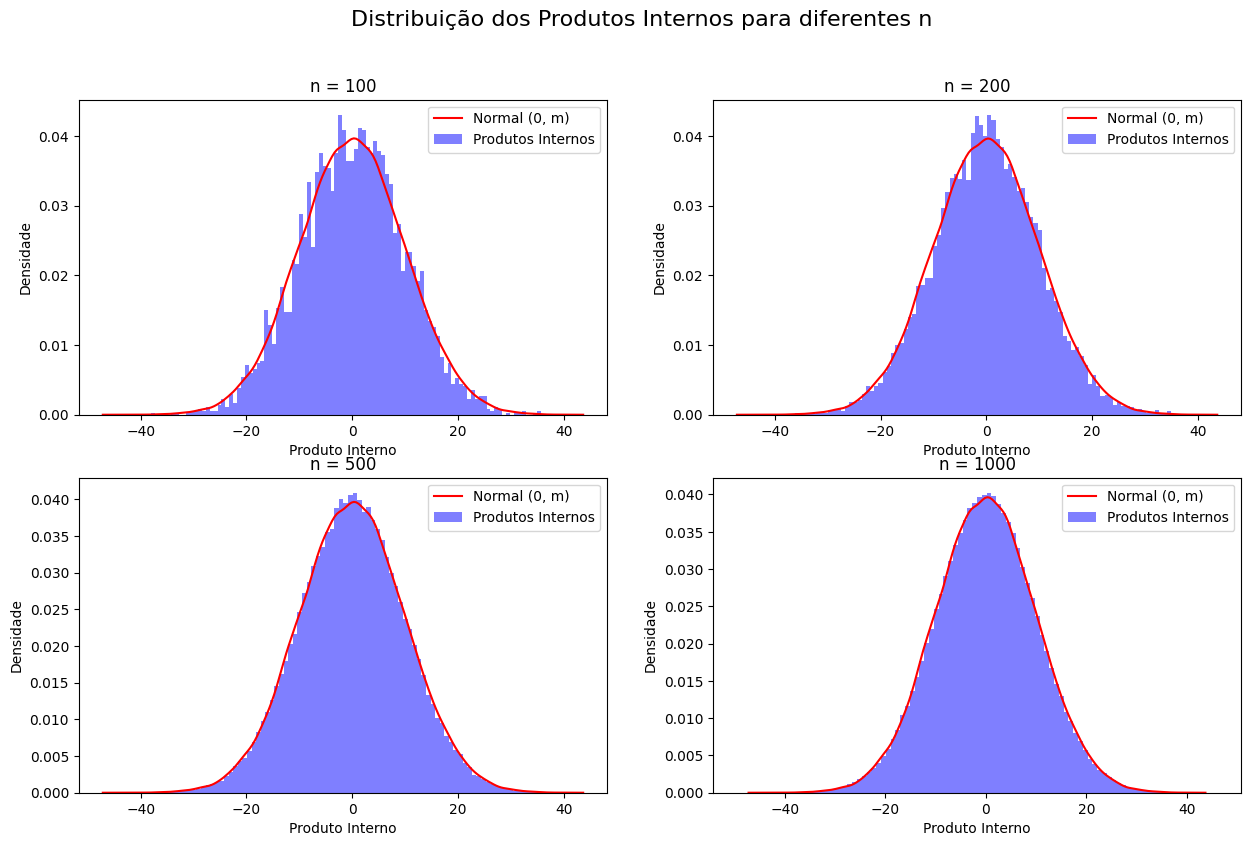

In [6]:
# Plots individuais
fig, axes = plt.subplots(2, 2, figsize=(15, 9))
fig.suptitle('Distribuição dos Produtos Internos para diferentes n', fontsize=16)
axes = axes.flatten()

for i in range(len(prod_ns)):
    ax = axes[i]
    sns.histplot(prod_ns[i], stat='density', color='blue', alpha=0.5, edgecolor=None, bins=100, ax=ax, label="Produtos Internos")
    sns.kdeplot(normais, color='red', ax=ax, label="Normal (0, m)")
    ax.set_title(f'n = {ns[i]}')
    ax.set_xlabel('Produto Interno')
    ax.set_ylabel('Densidade')
    ax.legend()

plt.show()

**SOLUÇÃO:** A distribuição do produto interno entre colunas distintas de $A$ é a soma de produtos de 2 variáveis i.i.d. $N(0,1)$, deste modo, sua distribuição é muito complexa, e apresenta função de densidade complicada, mesmo assim, é possível encontrar o valor esperado dessa variável aleatória:

$$
E[⟨A_{i},A_{j}⟩] = E[\sum_{k=1}^{m} A_{k i} A_{k j}] = \sum_{k=1}^{m} E[A_{k i} A_{k j}]
$$

Como as entradas da matriz são independentes:

$$
E[⟨A_{i},A_{j}⟩] = E[\sum_{k=1}^{m} A_{k i} A_{k j}] = \sum_{k=1}^{m} E[A_{k i} A_{k j}] = \sum_{k=1}^{m} E[A_{k i}] E[A_{k j}] = 0
$$

Já que todas as entradas são i.i.d. $N(0,1)$. Como as entradas da matriz são independentes, também é possível encontrar a variância:

$$
Var(⟨A_{i},A_{j}⟩) = Var(\sum_{k=1}^{m} A_{k i} A_{k j}) = \sum_{k=1}^{m} Var(A_{k i} A_{k j})
$$

Para calcular $Var(A_{k i} A_{k j})$, é necessário apenas calcular $E[(A_{k i} A_{k j})^2]$, uma vez que é sabido, pelo cálculo anterior que $E[A_{k i} A_{k j}] = 0$, deste modo, como:

$$
E[(A_{k i})^2] = Var(A_{k i}) - E[A_{k i}] = 1 - 0 = 1
$$

Então:

$$
E[(A_{k i} A_{k j})^2] = E[(A_{k i})^2] E[(A_{k j})^2] = 1 \cdot 1 = 1
$$

Portanto:

$$
Var(A_{k i} A_{k j}) = 1 - 0 = 1
$$

Onde conclui-se que:

$$
Var(⟨A_{i},A_{j}⟩) = Var(\sum_{k=1}^{m} A_{k i} A_{k j}) = \sum_{k=1}^{m} Var(A_{k i} A_{k j}) = \sum_{k=1}^{m} 1 = m
$$

Além disso, por se tratar da soma de variáveis aleatórias i.i.d. com valor esperado e variância definidos, pelo Teorema Central do Limite, conclui-se que:

$$
\frac{⟨A_{i},A_{j}⟩}{\sqrt{m}} \xrightarrow{P} N(0,1) \Rightarrow ⟨A_{i},A_{j}⟩ \xrightarrow{P} N(0, m)
$$

Portanto, como o valor de $m$ é grande, no caso 100, então a função de densidade dos produtos internos se aproxima, a medida que aumenta o valor de $n$ e se refina a aproximação, da normal $(0,m)$, como pode-se observar no gráfico 3. Mas isso ocorre somente por conta do alto valor de $m$.

In [7]:
m = 3 # Quantidade de somas
prod_ns = []

A = np.random.randn(m, n)
prod = A.T @ A
prods_inter = prod[np.tril_indices_from(prod, k=-1)]
prod_ns.append(prods_inter)

# Distribuição teórica esperada
normais = np.sqrt(m) * np.random.randn(100000)

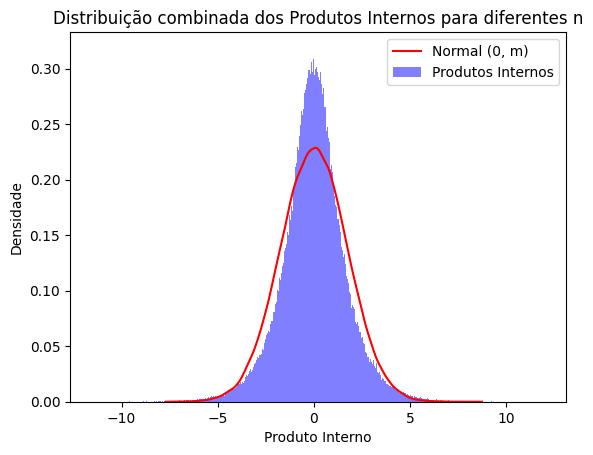

In [8]:
# Plot combinado
for i in range(len(prod_ns)):
    sns.histplot(prod_ns[i], stat='density', color='blue', alpha=0.5, edgecolor=None, bins=1000, label="Produtos Internos")
sns.kdeplot(normais, color='red', label="Normal (0, m)")
plt.xlabel('Produto Interno')
plt.ylabel('Densidade')
plt.title('Distribuição combinada dos Produtos Internos para diferentes n')
plt.legend()
plt.show()

Caso seja usado um valor pequeno de $m$, no caso $m=3$, então, a aproximação do Teorema Central do Limite é grosseira, logo, a função não se aproxima de uma normal, como pode ser observado no gráfico 4.

#### **c)  A distribuição do máximo.** Queremos ver quão “não ortogonal” é a matriz $A$. Para  isto, vamos estudar o máximo de $\frac{|⟨Ai,Aj⟩|}{∥Ai∥∥Aj∥}$ entre colunas distintas de uma matriz gaussiana $A$. Para isto, gere $K = 1000$ matrizes gaussianas $A_{k}$ de ordem $100×300$, calcule o máximo  indicado acima, e faça um histograma dos $K$ valores obtidos

In [9]:
n = 300
m = 100
ks = [33, 100, 333, 1000]
resultados = []

for k in ks:
  valores = []
  for _ in range(k):
      print(f'Executando iteração {_+1} de {k}', end='\r')
      A = np.random.randn(m, n)
      norms = np.linalg.norm(A, axis=0)
      A_norm = A / norms
      prod = A_norm.T @ A_norm
      inters = np.abs(prod[np.tril_indices_from(prod, k=-1)])
      valores.append(np.max(inters))
  resultados.append(valores)

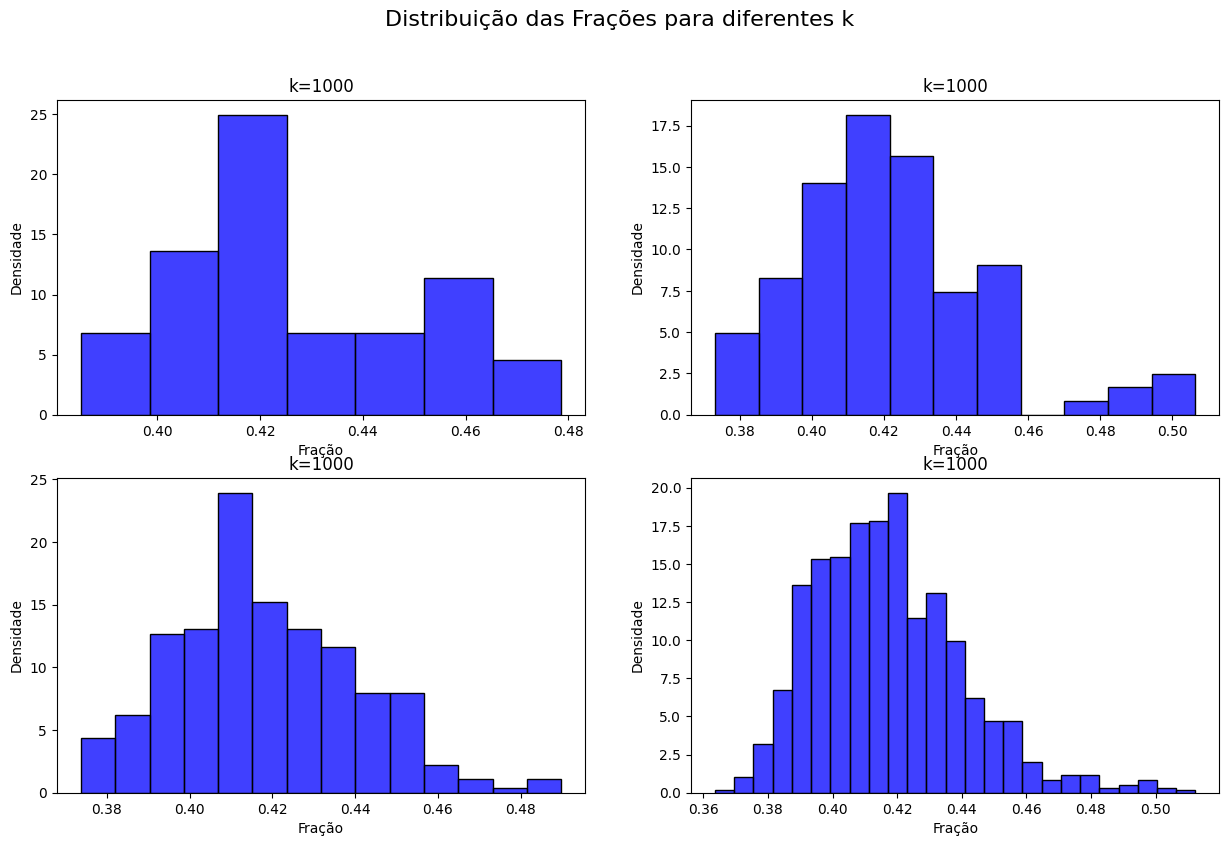

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(15, 9))
fig.suptitle('Distribuição das Frações para diferentes k', fontsize=16)
axes = axes.flatten()

a=0
for valores in resultados:
  ax = axes[a]
  sns.histplot(valores, stat='density', color='blue', ax=ax)
  ax.set_title(f'k={k}')
  ax.set_xlabel('Fração')
  ax.set_ylabel('Densidade')
  a+=1
plt.show()

**SOLUÇÃO:** Para a construção do gráfico 5, ao invés do cálculo convencional e imediato das normas, foi realizado o seguinte procedimento: foram normalizadas as colunas da matriz $A$, depois foi realizado o produto $A^*A$, calculado o valor absoluto dessa matriz e coletado os valores do triângulo inferior desse resultado. Esse procedimento é equivalente ao anterior, entretanto, por conta das otimizações no produto das matrizes acaba sendo bem mais eficiente. Quanto aos resultados, é notável, pelo gráfico 5, uma alta concentração a medida que se aumenta o valor de $K$ em torno do valor $0.42$, inclusive para o valor de $K = 1000$, que foi solicitado.

#### **d) Complexidade computacional.** Qual a complexidade de calcular o máximo acima? Qual valor de $K$ você acha que seria bom para ter uma boa estimativa do máximo esperado?

In [18]:
n = 300
m = 100
ks = list(range(10, 3011, 50))
resultados = []

for k in ks:
  valores = []
  for _ in range(k):
      print(f'Executando iteração {_+1} de {k}', end='\r')
      A = np.random.randn(m, n)
      norms = np.linalg.norm(A, axis=0)
      A_norm = A / norms
      prod = A_norm.T @ A_norm
      inters = np.abs(prod[np.tril_indices_from(prod, k=-1)])
      valores.append(np.max(inters))
  valores = np.array(valores)
  resultados.append(valores.mean())

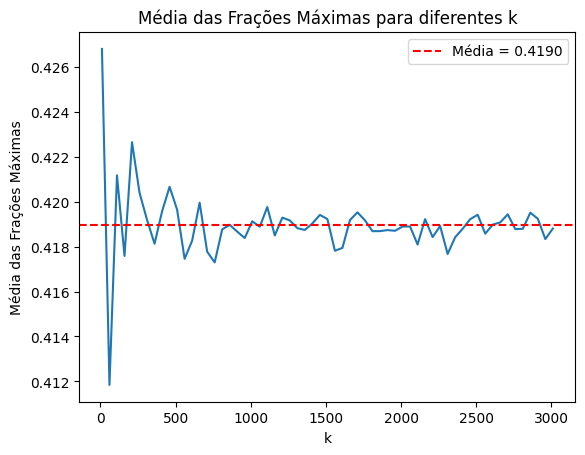

In [20]:
resultados = np.array(resultados)
media = np.mean(resultados[-10:])
plt.plot(ks, resultados)
plt.axhline(y=media, color='red', linestyle='--', label=f'Média = {media:.4f}')
plt.xlabel('k')
plt.ylabel('Média das Frações Máximas')
plt.title('Média das Frações Máximas para diferentes k')
plt.legend()
plt.show()

**SOLUÇÃO:** Para cada valor de $K$, a etapa mais custosa do cálculo se refere ao produto $A^*A$ que possui complexidade $O(m \times n^2)$, deste modo a complexidade de realizar o cálculo é $O(K \times m \times n^2)$.

#### **e)  A distribuição do máximo, parte 2.** Escolha valores de $K$ correspondentes e faça histogramas e comente os resultados para os seguintes pares de $(m,n)$: $(100,100)$, $(100,300)$, $(200,200)$, $(200,600)$, $(500,500)$, $(500,1500)$, $(1000,1000)$, $(1000,3000)$.

In [16]:
ks = [100, 150, 200]
#ms = [100, 100, 200]
ms = [100, 100, 200, 200, 500, 500, 1000, 1000]
ns = [100, 300, 200, 600, 500, 1500, 1000, 3000]

resultados = {}

for k in ks:
    resultados[k] = []
    for l in range(len(ms)):
        m = ms[l]
        n = ns[l]
        valores = []
        for _ in range(k):
            print(f'Executando iteração {_+1} de {k}, para A ({m} x {n})', end='\r')
            A = np.random.randn(m, n)
            norms = np.linalg.norm(A, axis=0)
            A_norm = A / norms
            prod = A_norm.T @ A_norm
            inters = np.abs(prod[np.tril_indices_from(prod, k=-1)])
            valores.append(np.max(inters))
        resultados[k].append(valores)

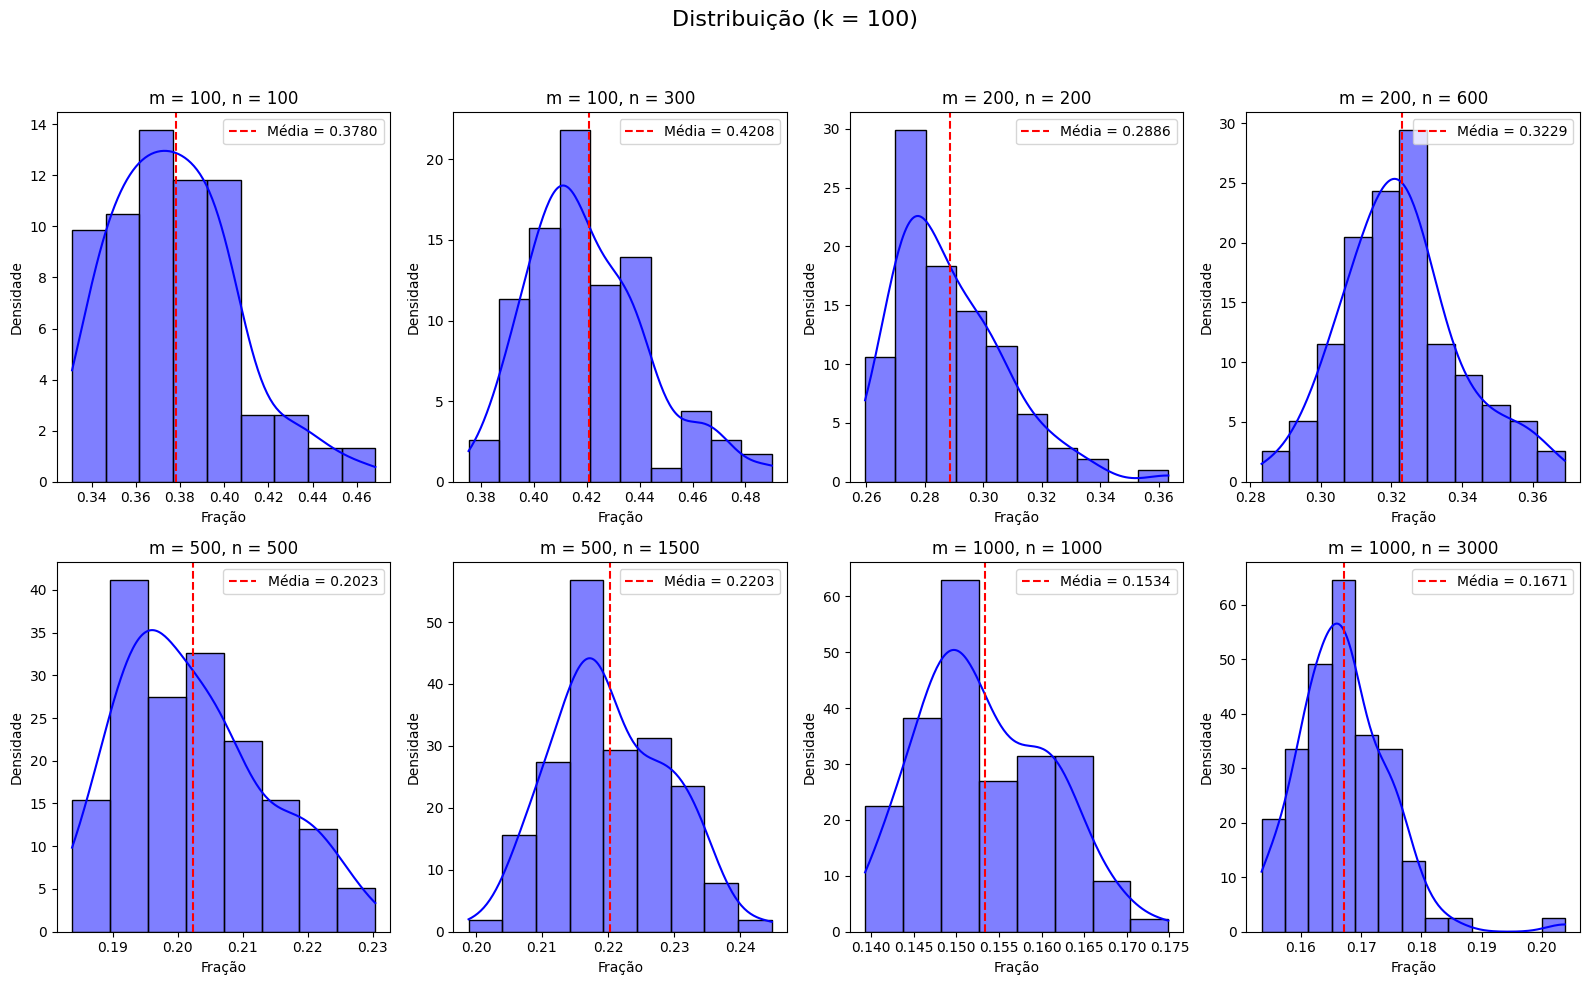

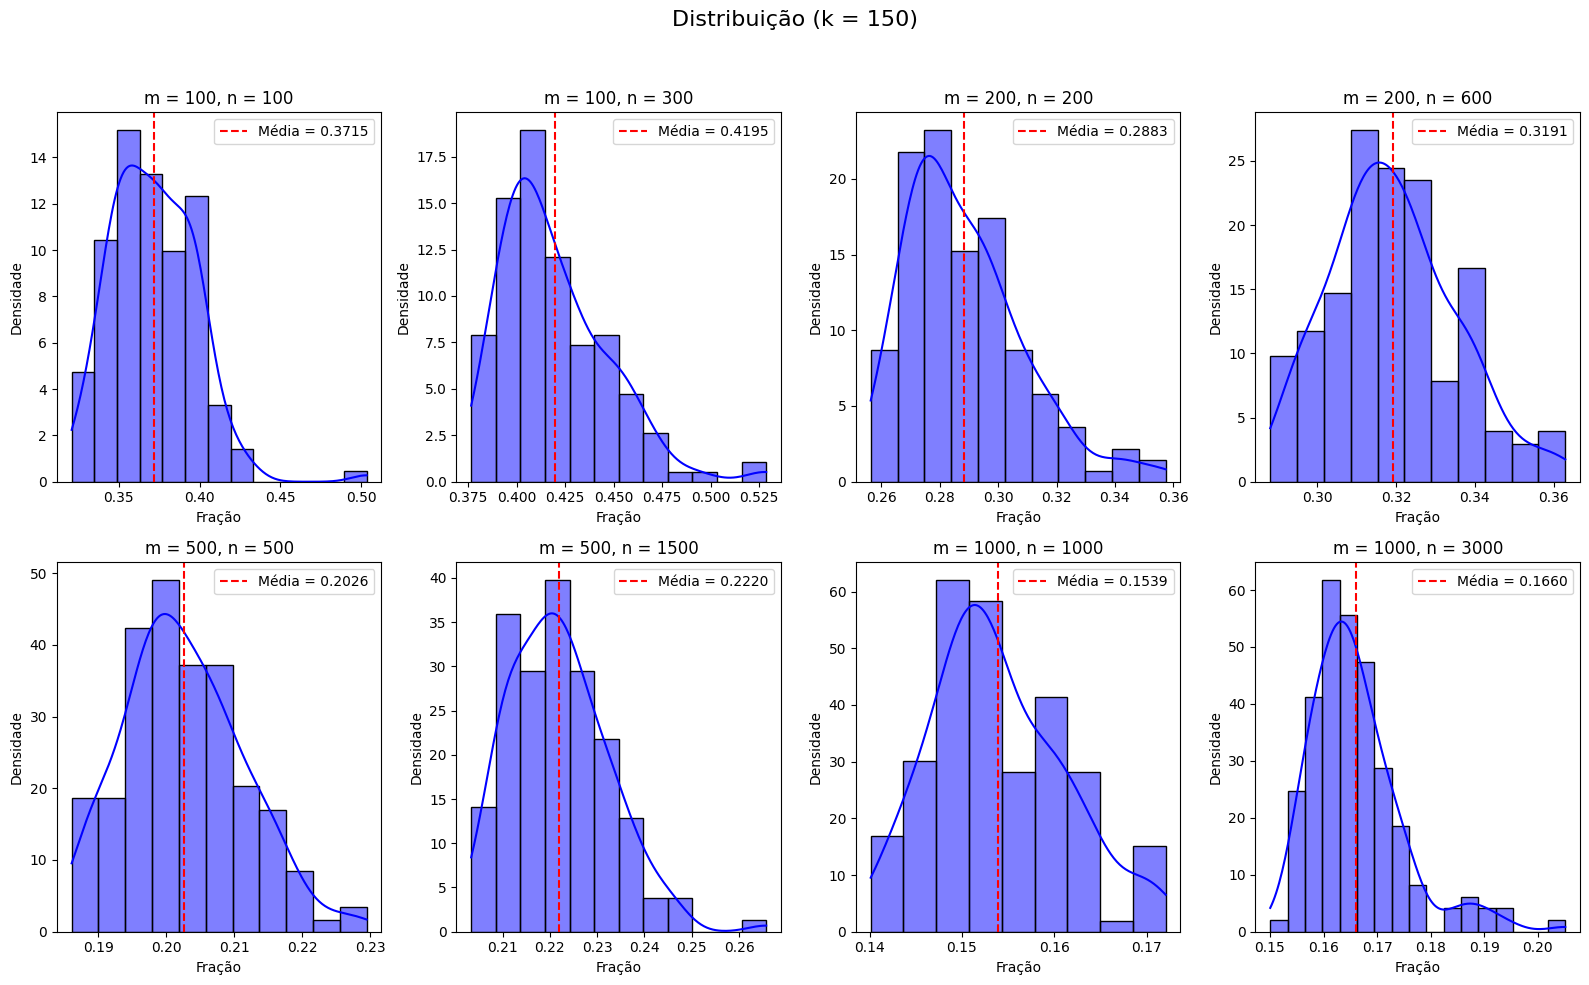

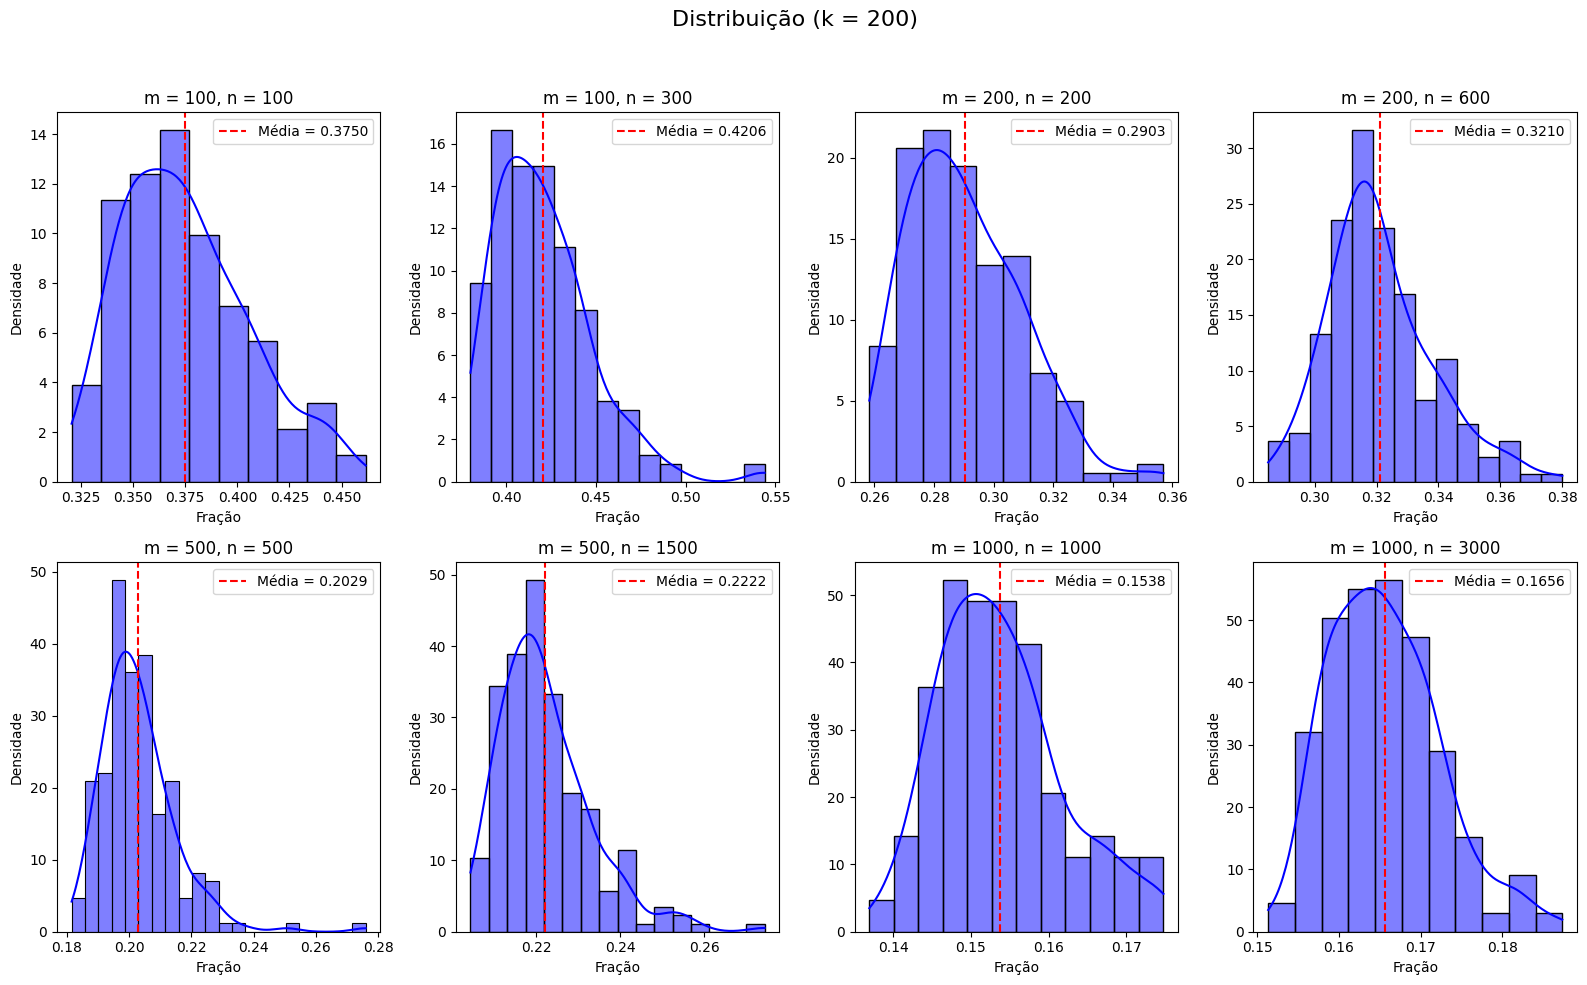

In [17]:
for k in ks:
    fig, axes = plt.subplots(2, 4, figsize=(16, 10))
    fig.suptitle(f'Distribuição (k = {k})', fontsize=16)
    axes = axes.flatten()
    for l in range(len(ms)):
        m = ms[l]
        n = ns[l]
        valores = resultados[k][l]
        ax = axes[l]
        sns.histplot(valores, stat='density', color='blue', ax=ax, kde=True)
        media = np.mean(valores)
        ax.axvline(x=media, color='red', linestyle='--', label=f'Média = {media:.4f}')
        ax.set_title(f'm = {m}, n = {n}')
        ax.set_xlabel('Fração')
        ax.set_ylabel('Densidade')
        ax.legend()
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()
    print("\n")